In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import pprint
from sklearn.preprocessing import MinMaxScaler

df = pd.read_csv("BGSgirls.csv")
col = ["WT2", "HT2", "WT9", "HT9", "LG9", "WT18", "HT18", "LG18"]
df = df[col]

In [3]:
def normalize(df):
    scaler = MinMaxScaler()
    df_std = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
    return df_std

def generate_subset(lst):
    n = len(lst)
    subsets = []
    for i in range(1 << n):
        subset = [lst[j] for j in range(n) if i & (1 << j)]
        subsets.append(subset)
    return subsets

def culc_aic(explanatory_variable, target_variable, df):
    df_reg = df[:]
    x = df_reg[explanatory_variable][:]
    y = df_reg[target_variable][:]
    model = sm.GLM(y, sm.add_constant(x))
    result = model.fit()
    aic = result.aic.round(3)
    return aic

def solve(explanatory_variable, target_variable, df):
    result = {}
    subsets = generate_subset(explanatory_variable)
    for subset in subsets:
        if subset:
            result[f"{subset}"] = culc_aic(subset, target_variable, df)
    result = sorted(result.items(), key=lambda x:x[1])
    return result

In [4]:
df_std = normalize(df)

<Axes: >

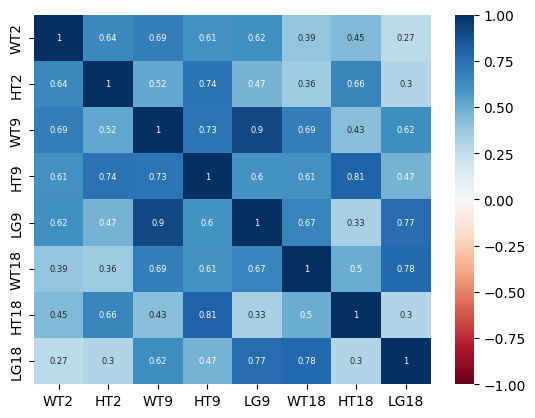

In [5]:
sns.heatmap(df_std.corr(), vmax=1, vmin=-1, cmap='RdBu', annot=True, annot_kws={"size": 6})

<Axes: >

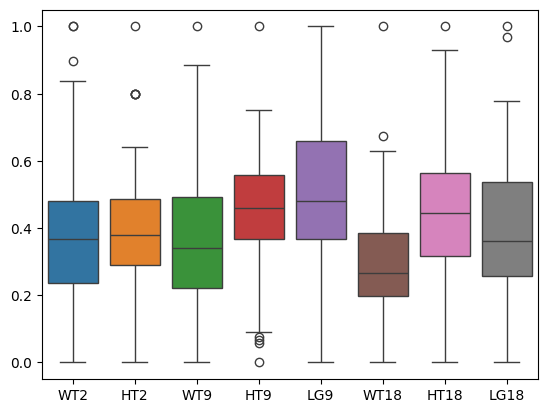

In [6]:
sns.boxplot(data=df_std)

<Axes: >

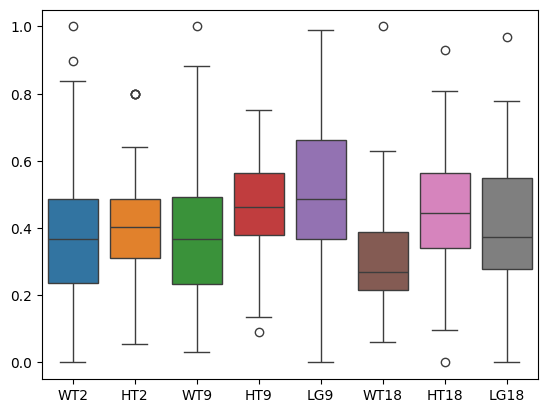

In [7]:
Q1 = df_std["HT9"].quantile(0.25)
Q3 = df_std["HT9"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_std = df_std[(df_std["HT9"] >= lower_bound) & (df_std["HT9"] <= upper_bound)]
sns.boxplot(data=df_std)

In [8]:
Q1 = df["HT9"].quantile(0.25)
Q3 = df["HT9"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["HT9"] >= lower_bound) & (df["HT9"] <= upper_bound)]

In [9]:
explanatory_variable1 = ["WT2", "HT2", "WT9", "HT9", "WT18", "LG18"]
target_variable = "HT18"

pprint.pprint(solve(explanatory_variable1, target_variable, df_std))

[("['HT2', 'WT9', 'HT9', 'WT18']", -95.193),
 ("['HT2', 'WT9', 'HT9', 'WT18', 'LG18']", -94.697),
 ("['WT9', 'HT9', 'WT18']", -93.998),
 ("['WT2', 'WT9', 'HT9', 'WT18']", -93.815),
 ("['WT2', 'HT2', 'WT9', 'HT9', 'WT18']", -93.709),
 ("['WT9', 'HT9', 'WT18', 'LG18']", -93.447),
 ("['WT2', 'HT2', 'WT9', 'HT9', 'WT18', 'LG18']", -92.846),
 ("['WT2', 'WT9', 'HT9', 'WT18', 'LG18']", -92.601),
 ("['WT9', 'HT9']", -92.467),
 ("['HT2', 'WT9', 'HT9']", -92.192),
 ("['WT2', 'WT9', 'HT9']", -91.133),
 ("['WT9', 'HT9', 'LG18']", -90.524),
 ("['HT2', 'WT9', 'HT9', 'LG18']", -90.366),
 ("['WT2', 'HT2', 'WT9', 'HT9']", -90.278),
 ("['WT2', 'WT9', 'HT9', 'LG18']", -89.453),
 ("['WT2', 'HT2', 'WT9', 'HT9', 'LG18']", -88.575),
 ("['WT2', 'HT2', 'HT9', 'WT18', 'LG18']", -83.811),
 ("['HT9']", -83.212),
 ("['HT9', 'LG18']", -83.117),
 ("['HT9', 'WT18', 'LG18']", -83.005),
 ("['HT2', 'HT9', 'WT18', 'LG18']", -82.83),
 ("['HT2', 'HT9']", -82.801),
 ("['WT2', 'HT2', 'HT9']", -82.755),
 ("['WT2', 'HT2', 'HT9

In [10]:
explanatory_variable2 = ["WT2", "HT2", "HT9", "LG9", "WT18", "LG18"]

pprint.pprint(solve(explanatory_variable2, target_variable, df_std))

[("['HT2', 'HT9', 'LG9', 'WT18']", -90.413),
 ("['WT2', 'HT2', 'HT9', 'LG9', 'WT18']", -88.434),
 ("['HT2', 'HT9', 'LG9', 'WT18', 'LG18']", -88.42),
 ("['HT9', 'LG9', 'WT18']", -88.332),
 ("['HT2', 'HT9', 'LG9']", -88.296),
 ("['HT9', 'LG9']", -88.001),
 ("['HT2', 'HT9', 'LG9', 'LG18']", -87.685),
 ("['WT2', 'HT9', 'LG9', 'WT18']", -86.622),
 ("['HT9', 'LG9', 'LG18']", -86.551),
 ("['WT2', 'HT2', 'HT9', 'LG9']", -86.451),
 ("['WT2', 'HT2', 'HT9', 'LG9', 'WT18', 'LG18']", -86.434),
 ("['HT9', 'LG9', 'WT18', 'LG18']", -86.362),
 ("['WT2', 'HT9', 'LG9']", -86.041),
 ("['WT2', 'HT2', 'HT9', 'LG9', 'LG18']", -85.728),
 ("['WT2', 'HT9', 'LG9', 'LG18']", -85.049),
 ("['WT2', 'HT9', 'LG9', 'WT18', 'LG18']", -84.637),
 ("['WT2', 'HT2', 'HT9', 'WT18', 'LG18']", -83.811),
 ("['HT9']", -83.212),
 ("['HT9', 'LG18']", -83.117),
 ("['HT9', 'WT18', 'LG18']", -83.005),
 ("['HT2', 'HT9', 'WT18', 'LG18']", -82.83),
 ("['HT2', 'HT9']", -82.801),
 ("['WT2', 'HT2', 'HT9']", -82.755),
 ("['WT2', 'HT2', 'HT9'

In [11]:
explanatory_variable = ['HT2', 'WT9', 'HT9', 'WT18']
x = df[explanatory_variable][:]
y = df[target_variable][:]
model = sm.GLM(y, sm.add_constant(x))
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                   HT18   No. Observations:                   65
Model:                            GLM   Df Residuals:                       60
Model Family:                Gaussian   Df Model:                            4
Link Function:               Identity   Scale:                          11.016
Method:                          IRLS   Log-Likelihood:                -167.61
Date:                Sat, 04 Jan 2025   Deviance:                       660.97
Time:                        09:32:20   Pearson chi2:                     661.
No. Iterations:                     3   Pseudo R-squ. (CS):             0.7875
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         12.5006     16.248      0.769      0.442     -19.345      44.346
HT2            0.3213      0.185      1.739      0.082      -0.041       0.684
WT9           -0.4756      0.115     -4.141      0.000      -0.701      -0.250
HT9            0.9775      0.145      6.733      0.000       0.693       1.262
WT18           0.1492      0.068      2.190      0.028       0.016       0.283
==============================================================================
"""